### Sentiment Analysis with TF-IDF, TextBlob and Vader

In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/begum.arslan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
bert_data = pd.read_csv("tweets_w_bert_sentiments.csv", index_col=[0])

# TF-IDF (Term Frequency - Inverse Document Frequency)

### Train-Test-Split Data

In [3]:
X_train,X_test,Y_train, Y_test = train_test_split(bert_data['Text'], bert_data['Sentiment'], test_size=0.20, random_state=30)
print('Shape of training data: {}'.format(X_train.shape))
print('Shape of test data: {}'.format(X_test.shape))

Shape of training data: (15952,)
Shape of test data: (3988,)


# Applying TF_IDF Vectorizer

### Modelling with RandomForest

In [4]:
pipeline = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('rf', RandomForestClassifier()),
            ]
        )

In [5]:
#Fitting data to Pipeline
learner = pipeline.fit(X_train, Y_train)

In [6]:
#Predicting on Test Set
rf_y_pred = learner.predict(X_test)

In [7]:
classification_report(Y_test, rf_y_pred,output_dict=True)

{'1': {'precision': 0.6855670103092784,
  'recall': 0.9253246753246753,
  'f1-score': 0.7876036320568496,
  'support': 2156},
 '2': {'precision': 0.875,
  'recall': 0.08641975308641975,
  'f1-score': 0.15730337078651688,
  'support': 81},
 '3': {'precision': 0.7619047619047619,
  'recall': 0.11149825783972125,
  'f1-score': 0.19452887537993924,
  'support': 287},
 '4': {'precision': 0.5969230769230769,
  'recall': 0.3310580204778157,
  'f1-score': 0.42590559824368823,
  'support': 586},
 '5': {'precision': 0.6330014224751067,
  'recall': 0.5068337129840547,
  'f1-score': 0.5629348513598988,
  'support': 878},
 'accuracy': 0.6702607823470411,
 'macro avg': {'precision': 0.7104792543224449,
  'recall': 0.39222688394253735,
  'f1-score': 0.4256552655653786,
  'support': 3988},
 'weighted avg': {'precision': 0.6703100082506362,
  'recall': 0.6702607823470411,
  'f1-score': 0.6295090950469184,
  'support': 3988}}

In [8]:
f1_score(Y_test, rf_y_pred, average='weighted')

0.6295090950469184

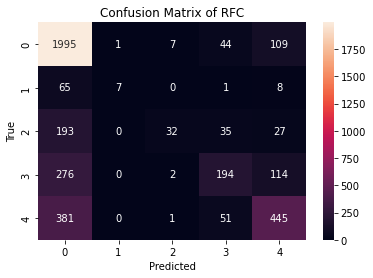

In [9]:
#Creating a confusion Matrix 

def random_forest_model(rf_y_pred):
    random_forest_model = confusion_matrix(Y_test,rf_y_pred)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(random_forest_model,annot=True,fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of RFC')
    return plt.show()

random_forest_model(rf_y_pred)

### Modelling with SVM

In [10]:
pipeline_svm = Pipeline(
            [
                ('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC()),
            ]
        )

In [11]:
#Fitting data to Pipeline
learner_clf = pipeline_svm.fit(X_train, Y_train)

In [12]:
#Predicting on Test Set
svm_pred = learner_clf.predict(X_test)

In [13]:
report=classification_report(Y_test, svm_pred,output_dict=True)
report

{'1': {'precision': 0.7771035598705501,
  'recall': 0.8910018552875696,
  'f1-score': 0.8301642178046672,
  'support': 2156},
 '2': {'precision': 0.5625,
  'recall': 0.1111111111111111,
  'f1-score': 0.18556701030927833,
  'support': 81},
 '3': {'precision': 0.49137931034482757,
  'recall': 0.1986062717770035,
  'f1-score': 0.28287841191067,
  'support': 287},
 '4': {'precision': 0.5374149659863946,
  'recall': 0.5392491467576792,
  'f1-score': 0.5383304940374788,
  'support': 586},
 '5': {'precision': 0.6695979899497487,
  'recall': 0.6070615034168565,
  'f1-score': 0.6367980884109916,
  'support': 878},
 'accuracy': 0.7111334002006018,
 'macro avg': {'precision': 0.6075991652303043,
  'recall': 0.469405977670044,
  'f1-score': 0.49474764449461717,
  'support': 3988},
 'weighted avg': {'precision': 0.693293842124819,
  'recall': 0.7111334002006018,
  'f1-score': 0.6922320653889392,
  'support': 3988}}

In [14]:
f1_score(Y_test, svm_pred, average='weighted')

0.6922320653889392

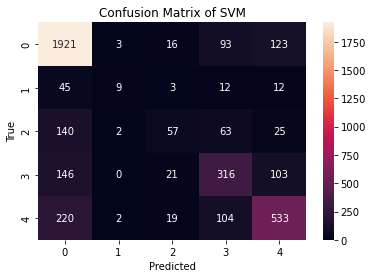

In [15]:
#Creating a confusion Matrix 

def svm_model(y_pred):
    svm_model = confusion_matrix(Y_test,y_pred)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(svm_model,annot=True,fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of SVM')
    return plt.show()

svm_model(svm_pred)

# Modelling with Vader

In [16]:
sia=SentimentIntensityAnalyzer()

bert_data['Vader'] = bert_data['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])
bert_data['Vader_Score'] = pd.cut(bert_data['Vader'], bins=5, labels=[1, 2, 3, 4, 5])
bert_data.drop('Vader',axis=1,inplace=True)

In [17]:
classification_report(bert_data['Sentiment'], bert_data['Vader_Score'],output_dict=True)

{'1': {'precision': 0.8701754385964913,
  'recall': 0.23046185298764055,
  'f1-score': 0.36441113805010655,
  'support': 10761},
 '2': {'precision': 0.02634084417645192,
  'recall': 0.21065989847715735,
  'f1-score': 0.04682651622002821,
  'support': 394},
 '3': {'precision': 0.10712607674236492,
  'recall': 0.45691382765531063,
  'f1-score': 0.17356001014970818,
  'support': 1497},
 '4': {'precision': 0.2033263059264465,
  'recall': 0.29245283018867924,
  'f1-score': 0.23987840265303306,
  'support': 2968},
 '5': {'precision': 0.4487062404870624,
  'recall': 0.34120370370370373,
  'f1-score': 0.3876397107166338,
  'support': 4320},
 'accuracy': 0.28029087261785357,
 'macro avg': {'precision': 0.33113498118576346,
  'recall': 0.3063384226024983,
  'f1-score': 0.24246315555790193,
  'support': 19940},
 'weighted avg': {'precision': 0.6056463068766041,
  'recall': 0.28029087261785357,
  'f1-score': 0.33030390614403515,
  'support': 19940}}

In [18]:
f1_score(bert_data['Sentiment'], bert_data['Vader_Score'], average='weighted')

0.33030390614403515

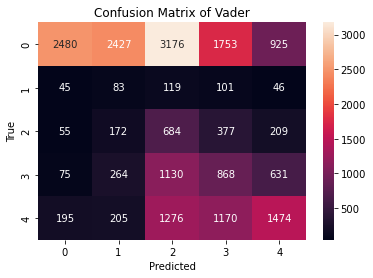

In [19]:
#Creating a confusion Matrix 

def Vader_Model(y_pred):
    vader_model = confusion_matrix(bert_data['Sentiment'],y_pred)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(vader_model,annot=True,fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of Vader')
    return plt.show()

Vader_Model(bert_data['Vader_Score'])

# Modelling with TextBlob

In [20]:
def textblob_analysis(x):
    analysis = TextBlob(x)
    return analysis.sentiment.polarity

In [21]:
bert_data['TextBlob'] = bert_data['Text'].apply(lambda x: textblob_analysis(x))

In [22]:
bert_data['TextBlob_Score'] = pd.cut(bert_data['TextBlob'],bins=5,labels=[1, 2, 3, 4, 5])
bert_data.drop('TextBlob',axis=1,inplace=True)

In [23]:
classification_report(bert_data['Sentiment'], bert_data['TextBlob_Score'],output_dict=True)

{'1': {'precision': 0.9045801526717557,
  'recall': 0.022023975466964038,
  'f1-score': 0.043000997913453694,
  'support': 10761},
 '2': {'precision': 0.022935779816513763,
  'recall': 0.08883248730964467,
  'f1-score': 0.036458333333333336,
  'support': 394},
 '3': {'precision': 0.08244623847967422,
  'recall': 0.770875083500334,
  'f1-score': 0.1489608880857106,
  'support': 1497},
 '4': {'precision': 0.19103260869565217,
  'recall': 0.23685983827493262,
  'f1-score': 0.2114921780986763,
  'support': 2968},
 '5': {'precision': 0.5957894736842105,
  'recall': 0.06550925925925925,
  'f1-score': 0.11803962460896768,
  'support': 4320},
 'accuracy': 0.120962888665998,
 'macro avg': {'precision': 0.3593568506695613,
  'recall': 0.23682012876222686,
  'f1-score': 0.11159040440802832,
  'support': 19940},
 'weighted avg': {'precision': 0.6523290395224186,
  'recall': 0.120962888665998,
  'f1-score': 0.09216312609086905,
  'support': 19940}}

In [24]:
f1_score(bert_data['Sentiment'], bert_data['TextBlob_Score'], average='weighted')

0.09216312609086905

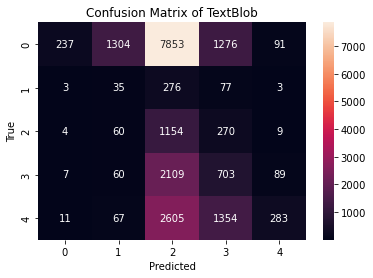

In [25]:
def TextBlob_Model(y_pred):
    vader_model = confusion_matrix(bert_data['Sentiment'],y_pred)
    fig = plt.plot(figsize=(8,5))
    sns.heatmap(vader_model,annot=True,fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix of TextBlob')
    return plt.show()

TextBlob_Model(bert_data['TextBlob_Score'])